In [3]:
#Practise 1：Chipotle快餐店（数据了解）

In [5]:
#导入数据到数据集chipo内并查看前10行内容

import pandas as pd
chipo = pd.read_csv('chipotle.tsv', sep= '\t')#由于是tsv文件（用tab做分隔符，csv文件用逗号做分隔符），所以用读取时需要加一个sep='\t'
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [18]:
#查看列数并打印全部列名
print (chipo.shape)#或者chipo.info()
print (chipo.columns)

(4622, 5)
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [20]:
#查看数据集的索引index
print (chipo.index)

RangeIndex(start=0, stop=4622, step=1)


In [48]:
#下单最多商品
import numpy as np
item_group = chipo.pivot_table(index='item_name', values='quantity',aggfunc=np.sum)
maxitem = item_group.sort_values(['quantity'], ascending = False)
print(maxitem.head(1))

              quantity
item_name             
Chicken Bowl       761


In [57]:
#下单商品种类数
print (chipo['item_name'].value_counts().count())
#另一种：print (chipo['item_name'].nunique()）

50


In [129]:
#在choice_desctiption中下单次数最多的商品
print (chipo['choice_description'].value_counts().head(1))

[Diet Coke]    134
Name: choice_description, dtype: int64


In [130]:
#下单商品总数
print (chipo['quantity'].sum())

4972


In [131]:
#订单总数
print (chipo['order_id'].value_counts().count())
#另一种:print (chipo['order_id'].nunique())

1834


In [141]:
#转换item_price为浮点数
#a = lambda x: float(x[1:-1]) #lambda调用匿名函数，作用相当于def但是有所不同
#chipo['item_price'] = chipo['item_price'].apply(a)
#print (chipo.dtypes)


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [159]:
#算总收入和每一个order的平均总价
chipo['revenue'] = chipo['quantity']*chipo['item_price']
print (round(chipo['revenue'].sum(), 2))#round()函数显示小数点后几位
a = round(chipo['revenue'].sum(), 2)
b = chipo['order_id'].value_counts().count()
print (a/b)

39237.02
21.3942311887


In [160]:
#Practise 2 欧洲杯（数据过滤排序）

In [164]:
#导入数据
import pandas as pd
import numpy as np
eu = pd.read_csv('Euro2012_stats.csv')
eu

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [173]:
#选取Goals一列，参赛队伍数量，一共多少列数据
print (eu['Goals'])
print (eu['Team'].count())
eu.info()

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64


In [176]:
#将Team, Yellow Cards, Red Cards三列数据存入discipline的DataFrame
discipline = eu[['Team', 'Yellow Cards', 'Red Cards']]#注意多一个[]的意义
discipline.head(5)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0


In [181]:
#按Red Cards对discipline排序，然后再按Yellow Cards排序
print (discipline.sort_values(['Red Cards'], ascending = False))
print (discipline.sort_values(['Yellow Cards'], ascending = False))


                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
7                 Italy            16          0
8           Netherlands             5          0
10             Portugal            12          0
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0
                   Team  Yellow Cards  Red Cards
7                 Italy            16          0
10             Portugal            12          0
13                Sp

In [188]:
#计算每个球队得黄牌的平均值
round(discipline['Yellow Cards'].mean())#注意mean()前面是点不是逗号

7

In [194]:
#进球数6个以上的球队数据
eu[eu['Goals'].values>6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [198]:
#名字以G开头的球队数据
eu[eu['Team'].str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [202]:
#选取前7列
eu.iloc[:,:7]#.iloc切片

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [204]:
#选取除了最后三列以外的全部列
eu.iloc[:,:-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [220]:
#查找英格兰意大利俄罗斯三队的射正率Shooting Accuracy
from pandas import Series
sa = Series(eu['Shooting Accuracy'].values, index=eu['Team'].values)
print (sa[['England','Italy','Russia']])

#另一种
eu.loc[eu['Team'].isin(['England','Italy','Russia']), ['Team','Shooting Accuracy']]
#.isin()判断括号内元素是否在列表中

England    50.0%
Italy      43.0%
Russia     22.5%
dtype: object


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [221]:
#Practise 3 酒类消费(数据分组)

In [224]:
import pandas as pd
import numpy as np
drink = pd.read_csv('drinks.csv')
drink.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [231]:
#哪个continent平均消费啤酒最多
round(drink.groupby('continent').beer_servings.mean(),2)#.groupby分类

continent
AF     61.47
AS     37.05
EU    193.78
OC     89.69
SA    175.08
Name: beer_servings, dtype: float64

In [233]:
#每个continent红酒消耗量
drink.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


In [235]:
#每个continent每种酒的平均消耗量
drink.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [238]:
#每个continent每种酒的消耗量中位数
drink.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


In [245]:
#每个continent对spirit的消耗平均值，最大值和最小值
drink.groupby('continent').spirit_servings.describe()
#drink.groupby('continent').spirit_servings.agg(['mean','max','min'])

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.339623,28.102794,0.0,1.00,3.0,19.00,152.0
AS,44.0,60.840909,84.362160,0.0,1.00,16.0,98.00,326.0
EU,45.0,132.555556,77.589115,0.0,81.00,122.0,173.00,373.0
OC,16.0,58.437500,70.504817,0.0,18.00,37.0,65.25,254.0
SA,12.0,114.750000,77.077440,25.0,65.75,108.5,148.75,302.0


In [246]:
#Practise 4 1960-2014美国犯罪数据

In [284]:
import pandas as pd
import numpy as np
uscrime = pd.read_csv('US_Crime_Rates_1960_2014.csv')
uscrime.head(5)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [285]:
#每一列的数据类型
uscrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.2 KB


In [286]:
#将Year数据类型转换为datetime64
uscrime.Year=pd.to_datetime(uscrime.Year, format='%Y')
uscrime.info()
#用dtype查看数据类型会发现Year为object，是python用来记录可变化的兑现的格式，但它并不能认出是时间格式

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.2 KB


In [287]:
#将Year设置为DataFrame的索引index
uscrime = uscrime.set_index('Year', drop=True)
#.set_index()设置列为行索引，默认drop=True是设置后不保留该列，=False则保留该列
uscrime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [288]:
#删除Total一列
del uscrime['Total']
uscrime

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965-01-01,193526000,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966-01-01,195576000,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967-01-01,197457000,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968-01-01,199399000,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


In [297]:
#按照Year每十年对DataFrame进行分组求和
crime = uscrime.resample('10AS').sum()
#按日期汇总数据
#将数据以W星期,M月,Q季度,QS季度的开始第一天开始,A年,10A十年,10AS十年聚合日期第一天开始.的形式进行聚合
#df.resample('xxxx').sum()
crime['Population'] = uscrime['Population'].resample('10AS').max()#注意这里population不能每年相加，只能去十年汇总中的最大值
crime


,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [305]:
#何时是美国历史上各种犯罪最猖獗的时代
uscrime.idxmax()
#idxmin()和idxmax()计算能够获取到数据框最小和最大值的索引值，argmin()和argmax()计算获取序列最小和最大值的索引值

Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

In [306]:
#Practise 5 虚拟姓名数据(数据合并)

In [313]:
#创建数据框
import pandas as pd
import numpy as np
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

data1 = pd.DataFrame(raw_data_1, columns = ['subject_id','first_name','last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id','first_name','last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])               
print (data1)
print (data2)

  subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
  subject_id first_name last_name
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan


In [315]:
#将data1和data2按照行的维度进行合并
all_data = pd.concat([data1,data2])
print (all_data)

  subject_id first_name last_name
0          1       Alex  Anderson
1          2        Amy  Ackerman
2          3      Allen       Ali
3          4      Alice      Aoni
4          5     Ayoung   Atiches
0          4      Billy    Bonder
1          5      Brian     Black
2          6       Bran   Balwner
3          7      Bryce     Brice
4          8      Betty    Btisan


In [317]:
#将data1和data2按照行的维度进行合并
all_data_col = pd.concat([data1,data2],axis=1)
print(all_data_col)

  subject_id first_name last_name subject_id first_name last_name
0          1       Alex  Anderson          4      Billy    Bonder
1          2        Amy  Ackerman          5      Brian     Black
2          3      Allen       Ali          6       Bran   Balwner
3          4      Alice      Aoni          7      Bryce     Brice
4          5     Ayoung   Atiches          8      Betty    Btisan


In [320]:
#按subject_id对all_data和data3进行合并
all_data_new = pd.merge(all_data,data3,on='subject_id')
print (all_data_new)
#用merage根据一个或多个键将不同DataFrame中的行连接起来。on=xxxx 用于显示指定列名（键名）
#concat  可以沿着一条轴将多个对象堆叠到一起，相当于数据库中的全连接(UNION ALL),可以指定按某个轴进行连接,
#也可以指定连接的方式join(outer,inner 只有这两种)，与数据库不同的时concat不会去重
#注意merge， join，concat在数据合并上的的区别

  subject_id first_name last_name  test_id
0          1       Alex  Anderson       51
1          2        Amy  Ackerman       15
2          3      Allen       Ali       15
3          4      Alice      Aoni       61
4          4      Billy    Bonder       61
5          5     Ayoung   Atiches       16
6          5      Brian     Black       16
7          7      Bryce     Brice       14
8          8      Betty    Btisan       15


In [321]:
#Practise 6 风速数据（数据统计）

In [429]:
#导入数据，并将前三列设为索引

import pandas as pd
import numpy as np
import datetime
wind = pd.read_table('wind.data', sep = "\s+", parse_dates=[[0,1,2]])
wind.head()
#sep="\s+"正则表达式匹配有多个空格分隔符时候调整数据框
#parse_dates=[[0,1,2]]传递参数将前三列一起解析为时间日期对象，注意格式上多一组[]

0      2061-01-01
1      2061-01-02
2      2061-01-03
3      2061-01-04
4      2061-01-05
5      2061-01-06
6      2061-01-07
7      2061-01-08
8      2061-01-09
9      2061-01-10
10     2061-01-11
11     2061-01-12
12     2061-01-13
13     2061-01-14
14     2061-01-15
15     2061-01-16
16     2061-01-17
17     2061-01-18
18     2061-01-19
19     2061-01-20
20     2061-01-21
21     2061-01-22
22     2061-01-23
23     2061-01-24
24     2061-01-25
25     2061-01-26
26     2061-01-27
27     2061-01-28
28     2061-01-29
29     2061-01-30
          ...    
6544   1978-12-02
6545   1978-12-03
6546   1978-12-04
6547   1978-12-05
6548   1978-12-06
6549   1978-12-07
6550   1978-12-08
6551   1978-12-09
6552   1978-12-10
6553   1978-12-11
6554   1978-12-12
6555   1978-12-13
6556   1978-12-14
6557   1978-12-15
6558   1978-12-16
6559   1978-12-17
6560   1978-12-18
6561   1978-12-19
6562   1978-12-20
6563   1978-12-21
6564   1978-12-22
6565   1978-12-23
6566   1978-12-24
6567   1978-12-25
6568   197

In [430]:
#修订日期一列里2061年的错误显示为1961
def fixdate(x):
    if x.year>1989:
          yr=x.year-100
    else:
          yr=x.year
    
    return datetime.datetime(yr,x.month,x.day)

wind['Yr_Mo_Dy'] = wind['Yr_Mo_Dy'].apply(fixdate)
wind
#先定义函数把所有20XX变为19XX然后用datetime.datetime传入Yr_Mo_Dy列

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
5,1961-01-06,13.21,8.12,9.96,6.67,5.37,4.50,10.67,4.42,7.17,7.50,8.12,13.17
6,1961-01-07,13.50,14.29,9.50,4.96,12.29,8.33,9.17,9.29,7.58,7.96,13.96,13.79
7,1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
8,1961-01-09,12.58,10.83,10.00,4.75,10.37,6.79,8.04,10.13,7.79,9.08,13.04,15.37
9,1961-01-10,13.37,11.12,19.50,8.33,9.71,6.54,11.42,7.79,8.54,9.00,8.58,11.83


In [431]:
#将日期设为索引，注意数据类型为datetime64
wind['Yr_Mo_Dy'] = pd.to_datetime(wind['Yr_Mo_Dy'] )#把Yr_Mo_Dy列数据类型转换为datetime64
wind = wind.set_index('Yr_Mo_Dy')#将Yr_Mo_Dy设为索引
wind.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [432]:
#查找有多少数据缺失
wind.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [433]:
#每一列有多少完整的数据值
wind.describe()
#或者wind.shape(0)-data.isnull().sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [434]:
#基于全体数据计算平均风速
wind.mean().mean()#各地的平均风速后在求平均

10.227982360836924

In [435]:
#创建loc_stats数据框计算每个location的风速最值平均值标准差
loc_stats = pd.DataFrame()#新建一个数据框

loc_stats['min'] = wind.min()#括号为空等同于（axis=0）按列求值
loc_stats['max'] = wind.max()
loc_stats['mean'] = wind.mean()
loc_stats['std'] = wind.std()

          
loc_stats
        

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


In [436]:
#创建一个day_stats数据框计算所有location每天的风速最值平均值标准差

day_stats = pd.DataFrame()

day_stats['min'] = wind.min(axis=1)#axis=1按行求值
day_stats['max'] = wind.max(axis=1)
day_stats['mean'] = wind.mean(axis=1)
day_stats['std'] = wind.std(axis=1)

day_stats

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
1961-01-09,4.75,15.37,9.897500,2.905954


In [443]:
#求每个location一月份的平均风速
wind.loc[wind.index.month==1].mean()
#对检索项wind.index检索月份等于1的项再做平均

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [447]:
#对数据按年为频率做降取样
wind.resample('A', kind='period').mean()
#月度数据转为年度数据的时候采用平均取样，'A'表示按年采样，kind='period'表示按时期而非时间戳显示索引


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [449]:
#对数据按月为频率做降采样
wind.resample('M',kind='period').mean()#'M'按月采样

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
1961-06,9.904138,8.520333,8.867000,6.083000,10.824000,6.707333,9.095667,8.849333,9.086667,9.940333,13.995000,14.553793
1961-07,10.614194,8.221613,9.110323,6.340968,10.532581,6.198387,8.353333,8.284194,8.077097,8.891613,11.092581,12.312903
1961-08,12.035000,10.133871,10.335806,6.845806,12.715161,8.441935,10.093871,10.460968,9.111613,10.544667,14.410000,14.345333
1961-09,12.531000,9.656897,10.776897,7.155517,11.003333,7.234000,8.206000,8.936552,7.728333,9.931333,13.718333,12.921667


In [450]:
#practise 7 泰坦尼克（数据可视化）

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline #在 Jupyter 中正常显示图形
titanic = pd.read_csv('train.csv')
titanic.head()

UsageError: unrecognized arguments: #在 Jupyter 中正常显示图形


In [8]:
#将PassengerId设为索引
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


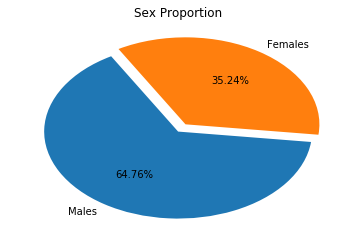

In [20]:
#绘制一个男女乘客比例的扇形图
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()
plt.pie(x=[males,females], #扇形图的变量
        labels = ['Males', 'Females'], #标签
        explode=(0,0.1), #区块的分离度
        startangle=90, #区块起始角度
        autopct='%0.2f%%')#区块内显示百分比，保留两位小数
plt.title('Sex Proportion')
plt.show()

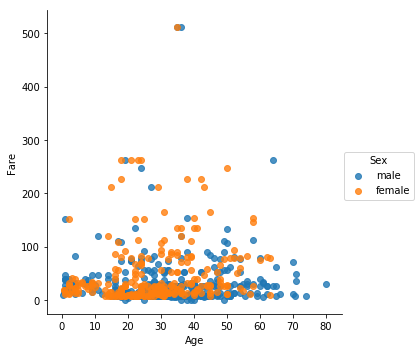

In [38]:
#绘制船票价格与乘客年龄性别的散点图
%matplotlib inline
sns.lmplot('Age','Fare',titanic, hue='Sex', fit_reg=False)

In [53]:
#生还人数
titanic.Survived.sum()

342

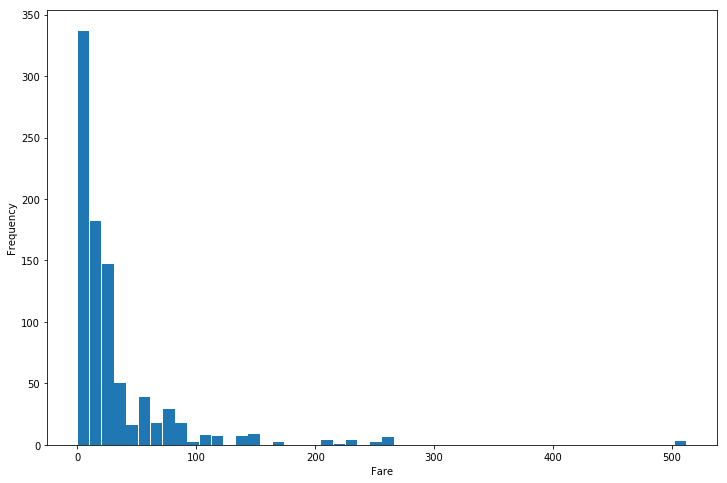

In [67]:
#船票价格直方图
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(titanic['Fare'], bins=50,rwidth=0.95)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [463]:
#Practise 8 Pokemon（创建DataFrame）

In [470]:
#创建一个字典
import pandas as pd
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

In [471]:
#新建一个名为pokemon的DataFrame存入该字典
pokemon = pd.DataFrame(raw_data)
pokemon

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


In [475]:
#把列顺序修改为name, type, hp, evolution,pokedex
pokemon = pokemon[['name','type','hp','evolution','pokedex']]#注意两组[]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


In [476]:
#添加一列place
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


In [479]:
#查看每一列的数据类型
pokemon.info()
#或者pokemon.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
name         4 non-null object
type         4 non-null object
hp           4 non-null int64
evolution    4 non-null object
pokedex      4 non-null object
place        4 non-null object
dtypes: int64(1), object(5)
memory usage: 272.0+ bytes


In [ ]:
#Practise 9 苹果公司股价（时间序列）

In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
appl = pd.read_csv('appl.csv')
appl.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [531]:
#查看每列数据类型
appl.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [532]:
#把Date列转换为datetime类型
Date = pd.to_datetime(appl['Date'])
appl['Date'].head()

0    2014-07-08
1    2014-07-07
2    2014-07-03
3    2014-07-02
4    2014-07-01
Name: Date, dtype: object

In [533]:
#把Date设置为index
appl = appl.set_index('Date')
appl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8465 entries, 2014-07-08 to 1980-12-12
Data columns (total 6 columns):
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1)
memory usage: 462.9+ KB


In [511]:
#检查索引有没有重复的日期
appl.index.is_unique#注意index.is_unique与df.duplicated区别

True

In [535]:
#把索引从时间降序改为时间升序排列
appl.sort_index(ascending=True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [544]:
#查找每个月的最后一个交易日（重取样）
appl = appl.set_index(pd.DatetimeIndex(appl.index))
#这里必须要把index转换为Datetimeindex才可以做resample
apple_month = appl.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


In [548]:
#数据中最早和最近日期相差的多少天
(appl.index.max()-appl.index.min()).days


12261

In [555]:
#数据中有多少个月
len(apple_month)

404

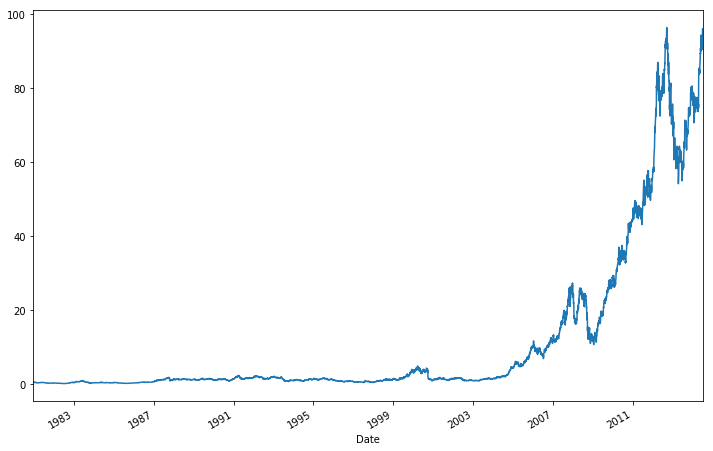

In [572]:
#按时间顺序作关于Adj Close的图

appl['Adj Close'].plot(figsize=(12,8))

In [573]:
#Practise 10 鸢尾花数据（数据删除）

In [624]:
import pandas as pd
import numpy as np
#创建DataFrame列名称
iris = pd.read_csv('iris.data', sep=',', names= ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [625]:
#查看有没有缺失值
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [626]:
#将petal_length一列的10到19行设置为缺失值
iris.iloc[10:20,2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [627]:
#将缺失值全部替换为1.0
iris.petal_length.fillna(1, inplace= True)#inplace=True指在原始对象上进行修改
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [628]:
#删除列class
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [629]:
#将数据框前三行设置为缺失值
iris.iloc[:3,:] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [630]:
#删除有缺失值的前三行
iris.dropna(axis=0, how='any',inplace=True)
#axis：0-行操作（默认），1-列操作 
#how：any-只要有空值就删除（默认），all-全部为空值才删除 
#inplace：False-返回新的数据集（默认），True-在愿数据集上操作
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


In [632]:
#重新设置索引
iris = iris.reset_index(drop=True)
#drop=True丢掉原索引，如果为False则将原索引保留为普通列
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
2,5.4,3.9,1.7,0.4
3,4.6,3.4,1.4,0.3
4,5.0,3.4,1.5,0.2
